In [1]:
import pandas as pd

data='./data/New_Resume_datasets.csv'

df=pd.read_csv(data)

In [2]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Cybersecurity', 'PMO', 'Database', 'Hadoop', 'ETL Developer',
       'DotNet Developer', 'Blockchain', 'Testing'], dtype=object)

Text(0, 0.5, '')

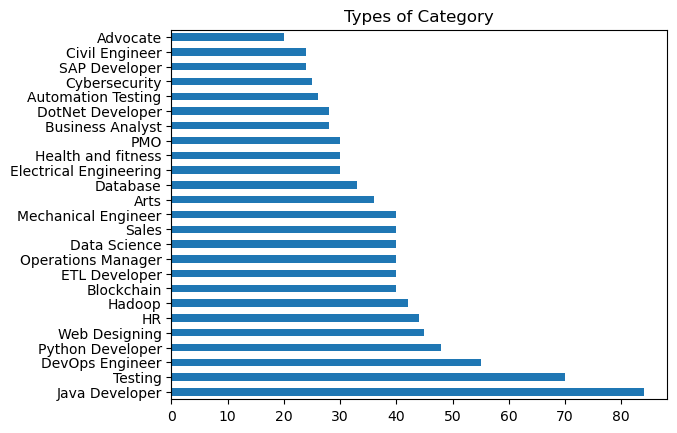

In [3]:
import matplotlib.pyplot as plt
df['Category'].value_counts().plot(kind='barh')
plt.title("Types of Category")
plt.xlabel("")
plt.ylabel("")

In [4]:
import nltk
import re
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
spacy.cli.download('en_core_web_sm')

nlp = spacy.load('en_core_web_sm')

def process(text):
    doc = nlp(text.lower())
    words = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]
    return ' '.join(words)

df['Cleaned_Resume']=df['Resume'].apply(process)
#df['Cleaned_Category'] = df['Category'].apply(process) #//

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hisha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hisha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hisha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression

vector = TfidfVectorizer(max_features = 500)
X=vector.fit_transform(df['Cleaned_Resume'])
y=df['Category']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

model = RandomForestClassifier(n_estimators=100,random_state=42)
#model = LogisticRegression()
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [6]:
from sklearn.metrics import classification_report,accuracy_score

y_pred = model.predict(X_test)

print("Model Performance\n\n")
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

Model Performance


                        precision    recall  f1-score   support

              Advocate       1.00      1.00      1.00         3
                  Arts       1.00      1.00      1.00         6
    Automation Testing       1.00      1.00      1.00         5
            Blockchain       1.00      1.00      1.00         7
      Business Analyst       1.00      1.00      1.00         4
        Civil Engineer       1.00      1.00      1.00         9
         Cybersecurity       1.00      1.00      1.00         3
          Data Science       1.00      1.00      1.00         5
              Database       1.00      1.00      1.00         8
       DevOps Engineer       1.00      1.00      1.00        14
      DotNet Developer       1.00      1.00      1.00         5
         ETL Developer       1.00      1.00      1.00         7
Electrical Engineering       1.00      1.00      1.00         6
                    HR       1.00      1.00      1.00        12
                Had

In [7]:
import fitz

def text_PDF(path):
    doc = fitz.open(path)
    text=""
    for words in doc:
        text = text + words.get_text("text")+"\n"
    return text
path = "./test_Resume/Sample_Resume.pdf"
resumeData = text_PDF(path)

In [8]:
print(resumeData)

John Doe
Email: john.doe@example.com | Phone: +1234567890
LinkedIn: linkedin.com/in/johndoe | GitHub: github.com/johndoe
Objective
Highly motivated Software Engineer with 3+ years of experience in developing efficient and scalable
applications. Seeking to leverage expertise in Python, Machine Learning, and Data Analysis to contribute to
innovative projects.
Experience
Software Engineer | ABC Tech Solutions | Jan 2022 - Present
- Developed and deployed machine learning models to optimize business operations.
- Collaborated with cross-functional teams to design and implement scalable software solutions.
- Improved application performance by 20% through efficient coding practices.
Education
Bachelor of Technology in Computer Science | XYZ University | Graduated: 2021
- GPA: 3.8/4.0
- Relevant coursework: Data Structures, Algorithms, Machine Learning.
Skills
Programming Languages: Python, Java, C++
Frameworks: TensorFlow, Flask, Django
Tools: Git, Docker, SQL, Power BI




In [9]:
import numpy as np

output = process(resumeData)
x_test = vector.transform([output]).toarray()
y_pred = model.predict_proba(x_test)[0] 

top = np.argsort(y_pred)[-3:][::-1]  
topCat = [(model.classes_[i], (y_pred[i] *100)) for i in top]

print("Top 3 matching jobs for your resume:\n")
for cat,per in topCat:
    print(f"{cat} : {per:.0f}%")

Top 3 matching jobs for your resume:

Data Science : 55%
Cybersecurity : 34%
Business Analyst : 9%


In [11]:
import joblib

joblib.dump(model, "resumeClassifier.pkl")
joblib.dump(vector, "resumeVector.pkl")

print("Saved with updated One")

Saved with updated One
